In [1]:
import random
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Let's take a look to KNN method

# # At first, we need a function that will generate clusters for us. Below it is created.

In [2]:
def GenerateRandomCluster(xCenter, yCenter, pointsIncluster, sigma, clusternumber):
    clusterdata = []
    for i in range(pointsIncluster):
        clusterdata.append((random.gauss(xCenter, sigma), random.gauss(yCenter, sigma), clusternumber))
    return clusterdata    

In [3]:
def generateClusters(clustersNumber, min_coordinate, max_length, pointInCluster, sigma):
    """this function creates clustersNumber in area from min_coordinate to max_length"""
    clustersData = []
    for i in range(clustersNumber):
        clustersData.append(GenerateRandomCluster(min_coordinate + max_length*random.random(),
                                                 min_coordinate + max_length*random.random(),
                                                 pointsInCluster,
                                                 sigma, 
                                                 i))
    return clustersData    

In [4]:
def drawclusters(clustersData):
    """this function draws clusters on a plot from ontained in above functions clustersData"""
    for i in clustersData:
        xData = []
        yData = []
        colors = []
        for j in i:
            xData.append(j[0])
            yData.append(j[1])
            colors.append(j[2])
        plt.scatter(xData, yData, label = colors[0])
    plt.show    

In [5]:
clustersNumber = 3
min_coordinate = 0
max_length = 100
pointsInCluster = 15
sigma = 5

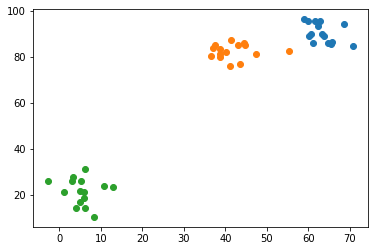

In [6]:
data = generateClusters(clustersNumber, min_coordinate, max_length, pointsInCluster, sigma)
drawclusters(data)

# Let's create a model


In [7]:
from sklearn.neighbors import KNeighborsClassifier 

In [8]:
model = KNeighborsClassifier(n_neighbors=3)

In [9]:
X = []
Y = []

for cluster in data:
    for point in cluster:
        X.append((point[0], point[1]))
        Y.append(point[2])     

In [10]:
model.fit(X,Y)

KNeighborsClassifier(n_neighbors=3)

# with help of meshgrid we create the set of point for our model fot it to tell us for what cluster belongs one or another point

In [11]:
def KNeigh(clustersData, model):
    step = 1
    xx, yy = np.meshgrid(np.arange(min_coordinate, min_coordinate+max_length, step), 
                         np.arange(min_coordinate, min_coordinate+max_length, step))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    map_color = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    plt.pcolormesh(xx, yy, Z, cmap=map_color)
    for cluster in clustersData:
        xData = []
        yData = []
        colors = []
        for point in cluster:
            xData.append(point[0])
            yData.append(point[1])
            colors.append(point[2])
        plt.scatter(xData, yData, label = colors[0])
    plt.show    


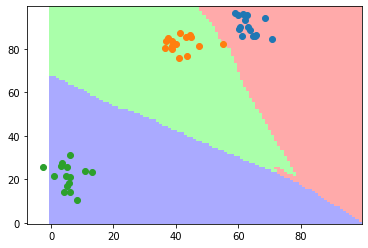

In [12]:

KNeigh( data, model )